# Main

> Test $x=3$
>> Test 3

1. a
    2. b
3. c

* d
    * f
        * 2-2
* g
---  
  
a<br>
b  
c  

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
import matplotlib.pyplot as plt

# Must declare data_dir as the directory of training and test files
data_dir = "./dataset/"

train_data = data_dir + "kddcup.data_10_percent_corrected"

names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv(train_data, names=names)
print(df.describe())

print(df.shape)
print(df['label'].value_counts())


# Divide by class
df_normal = df[df['label'] == 'normal.']
df_neptune = df[df['label'] == 'neptune.']
df_back = df[df['label'] == 'back.']
df_teardrop = df[df['label'] == 'teardrop.']
df_satan = df[df['label'] == 'satan.']
df_warezclient = df[df['label'] == 'warezclient.']
df_ipsweep = df[df['label'] == 'ipsweep.']
df_smurf = df[df['label'] == 'smurf.']
df_portsweep = df[df['label'] == 'portsweep.']
df_pod = df[df['label'] == 'pod.']
df_nmap = df[df['label'] == 'nmap.']
df_guess_passwd = df[df['label'] == 'guess_passwd.']
df_buffer_overflow = df[df['label'] == 'buffer_overflow.']
df_warezmaster = df[df['label'] == 'warezmaster.']
df_land = df[df['label'] == 'land.']
df_imap = df[df['label'] == 'imap.']
df_rootkit = df[df['label'] == 'rootkit.']
df_loadmodule = df[df['label'] == 'loadmodule.']
df_ftp_write = df[df['label'] == 'ftp_write.']
df_multihop = df[df['label'] == 'multihop.']
df_phf = df[df['label'] == 'phf.']
df_perl = df[df['label'] == 'perl.']
df_spy = df[df['label'] == 'spy.']

df = pd.concat([df_normal, df_neptune, df_smurf], axis=0)

df.drop('num_outbound_cmds', axis=1, inplace=True)
df.drop('is_host_login', axis=1, inplace=True)
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['label'] = df['label'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

data = df.values
Y = data[:,39]
X = data[:,0:39]
Y = Y.reshape(-1, 1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
pca = PCA(n_components=2)
rescaleX = pca.fit_transform(rescaleX)
rescaleX = np.append(rescaleX, Y, axis=1)
principalDf = pd.DataFrame(data = rescaleX, columns = ['principal component 1', 'principal component 2', 'label'])
principalDf.head()

            duration     src_bytes     dst_bytes           land  \
count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
mean       47.979302  3.025610e+03  8.685324e+02       0.000045   
std       707.746472  9.882181e+05  3.304000e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494021.000000  494021.000000  494021.000000      494021.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

,principal component 1,principal component 2,label
0,0.560535,1.428887,1.0
1,0.561570,1.404598,1.0
2,0.541429,1.380522,1.0
3,0.514420,1.354874,1.0
4,0.488805,1.329313,1.0


In [2]:
principalDf.label.value_counts()

2.0    280790
0.0    107201
1.0     97278
Name: label, dtype: int64

<Figure size 432x288 with 0 Axes>

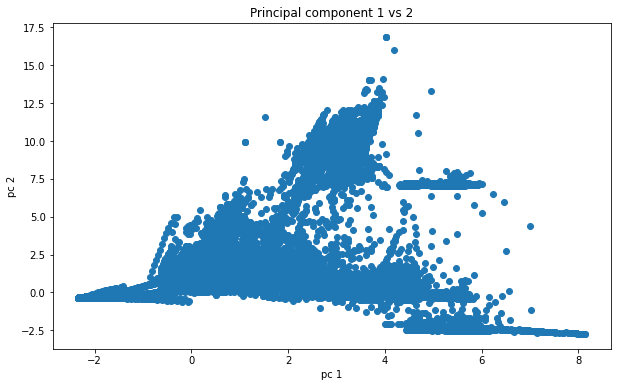

In [3]:
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])
plt.title('Principal component 1 vs 2')
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.show()

<Figure size 432x288 with 0 Axes>

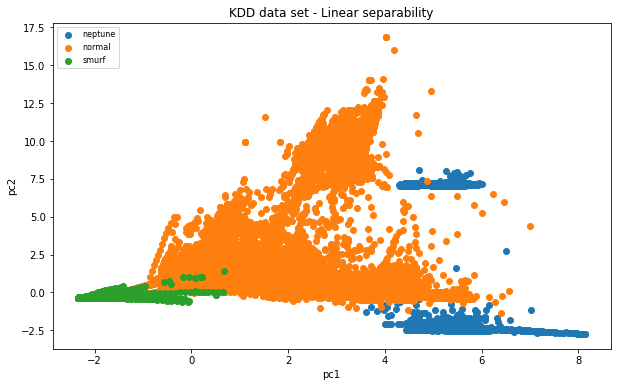

In [4]:
data = principalDf.values
label = data[:,2]
principalDf.label.value_counts()
names = ['neptune', 'normal', 'smurf']
range(len(names))

plt.clf()
plt.figure(figsize = (10, 6))
#markers = ['o', 's']
#label = numpy array of label column
plt.title('KDD data set - Linear separability')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['label'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i])
plt.legend(loc='upper left', fontsize=8)
plt.show()

<Figure size 432x288 with 0 Axes>

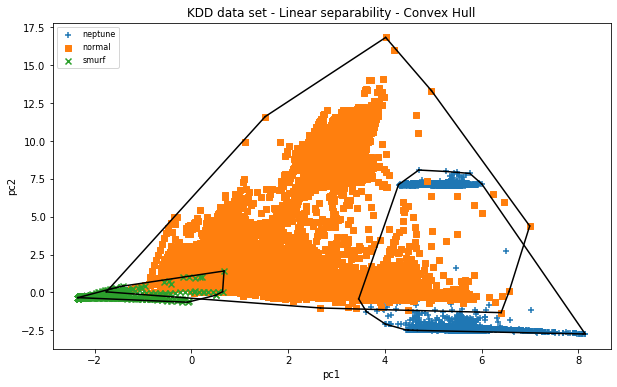

In [5]:
from scipy.spatial import ConvexHull
plt.clf()
plt.figure(figsize=(10, 6))
plt.title('KDD data set - Linear separability - Convex Hull')
plt.xlabel('pc1')
plt.ylabel('pc2')
markers = ['+', 's', 'x']
for i in range(len(names)):
    bucket = principalDf[principalDf['label'] == i]
    bucket = bucket.iloc[:, [0, 1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i], marker=markers[i])
    for j in hull.simplices:
        plt.plot(bucket[j, 0], bucket[j, 1], color='#000000')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Test
